In [6]:
import pandas as pd

In [32]:
content=pd.read_csv("/content/Content.csv")
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [33]:
content.shape

(1000, 6)

# Delete userId & URL columns

In [34]:
content=content.drop(columns=["User ID","URL","Unnamed: 0"])
content.head()

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [35]:
content = content.rename(columns={'Type': 'Content Type'})
content.head()

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


Remove " from some of the values of Category column

In [36]:
content['Category'] = content['Category'].str.replace('"', '')

# 2nd dataset

In [37]:
reaction=pd.read_csv("/content/Reactions.csv")
reaction.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [38]:
reaction.shape

(25553, 5)

In [39]:
#Rename column Type-> Reaction Type

reaction = reaction.rename(columns={'Type': 'Reaction Type'})

In [40]:
# Delete column user id

reaction=reaction.drop(columns=["User ID","Unnamed: 0"])
reaction.head()

,Content ID,Reaction Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


In [41]:
#null values in Reaction Type column

reaction['Reaction Type'].isnull().sum(0)

980

In [42]:
#drop the null value rows from the reaction df based on Reaction Type values

reaction=reaction.dropna(subset=['Reaction Type'])

In [43]:
reaction.shape

(24573, 3)

# 3rd dataset

In [44]:
#import reactiontypes.csv into dataframe

reaction_types=pd.read_csv("/content/ReactionTypes.csv")
reaction_types.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [45]:
reaction_types.drop(columns=["Unnamed: 0"],axis=1,inplace=True)
reaction_types.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [46]:
reaction_types = reaction_types.rename(columns={'Type': 'Reaction Type'})

In [47]:
reaction=reaction.merge(content,on="Content ID",how="left")
reaction.head()

,Content ID,Reaction Type,Datetime,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying


In [48]:
reaction=reaction.merge(reaction_types,on="Reaction Type",how="left")

reaction.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30


In [49]:
reaction['Category'] = reaction['Category'].str.lower()

In [50]:
# DataFrame with the cumulative sum for each category
cumulative_df = reaction.groupby('Category')['Score'].sum().reset_index()

print(cumulative_df)


           Category  Score
0           animals  74965
1           cooking  64756
2           culture  66579
3              dogs  52511
4         education  57436
5           fitness  55323
6              food  66676
7    healthy eating  69339
8   public speaking  49264
9           science  71168
10           soccer  57783
11         studying  54269
12       technology  68738
13           tennis  50339
14           travel  64880
15         veganism  49619


In [51]:
top_5_df = cumulative_df.sort_values(by='Score', ascending=False).head(5)
top_5_df

,Category,Score
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676


In [56]:
print(top_5_df['Score'].sum())

350886


In [58]:
(74965/350886)*100

21.364488751332342

In [60]:
for score in top_5_df['Score']:
  print((score/(top_5_df['Score'].sum()))*100) # popularity share of top 5 categories

21.364488751332342
20.282370912490098
19.7611189959132
19.589838295058794
19.002183045205566


# visualizing the insights

In [52]:
import matplotlib.pyplot as plt

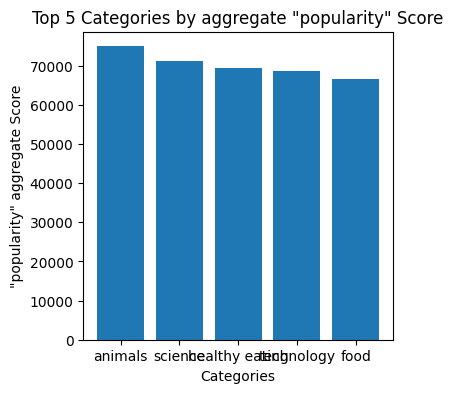

In [63]:
# draw a barplot of top_5_df
plt.figure(figsize=(4, 4))
plt.bar(top_5_df['Category'], top_5_df['Score'])
plt.title('Top 5 Categories by aggregate "popularity" Score')
plt.xlabel('Categories')
plt.ylabel('"popularity" aggregate Score')
plt.show()

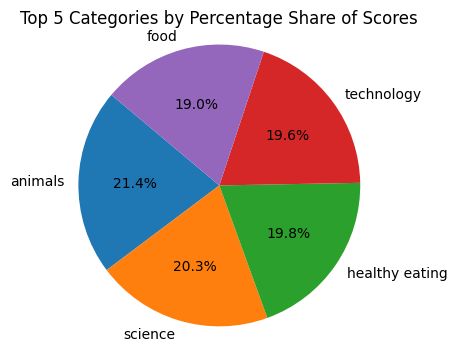

In [65]:
labels = top_5_df['Category']
percentages = (top_5_df['Score'] / top_5_df['Score'].sum()) * 100

# Plotting
plt.figure(figsize=(4, 4))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Categories by Percentage Share of Scores')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**FINAL INSIGHTS**


*Social Buzz - Top 5 Categories are :*

*   Animals
*   Science
*   Healthy Eating
*   Technology
*   Food


*Total unique Categories are : 16*












**ANALYSIS**

*Animals and Science are the two most popular categories of content showing that people enjoy real-life content the most*

**INSIGHT**

*There is a Food and Healthy Eating in the top-5 categories ,and Healthy Eating ranks higher than Food , which may indicates that the audience within your user base are more align towards healthy food.*

*so , you could use this insight to create a campaign and work with healthy food brands to boost your user engagement*